## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Importing Original Data

In [2]:
path = 'https://raw.githubusercontent.com/tanujmath/CreditGuard/main/data/cs-training.csv'
df = pd.read_csv(path)
df.shape

(150000, 12)

## Cleaning and Analyzing Data

In [3]:
# rename the first unnamed column to ID
df.rename(columns={'Unnamed: 0':'ID'}, inplace=True)
df.columns

Index(['ID', 'SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [4]:
# print number of NA entries 
nullseries = df.isnull().sum()
print(nullseries[nullseries > 0]) 

MonthlyIncome         29731
NumberOfDependents     3924
dtype: int64


In [5]:
# drop NA
df.dropna(inplace=True)
print("After dropping NA, size of df =",df.shape)
# deleting age = 0 rows, everything else is allowed to be zero
df = df[df.age != 0]
print("After deleting rows with zero age, size of df =",df.shape)

After dropping NA, size of df = (120269, 12)
After deleting rows with zero age, size of df = (120268, 12)


## Data Visualization

Text(0.5, 1.0, 'Number Real Estate Loans Or Lines Scatter Plot')

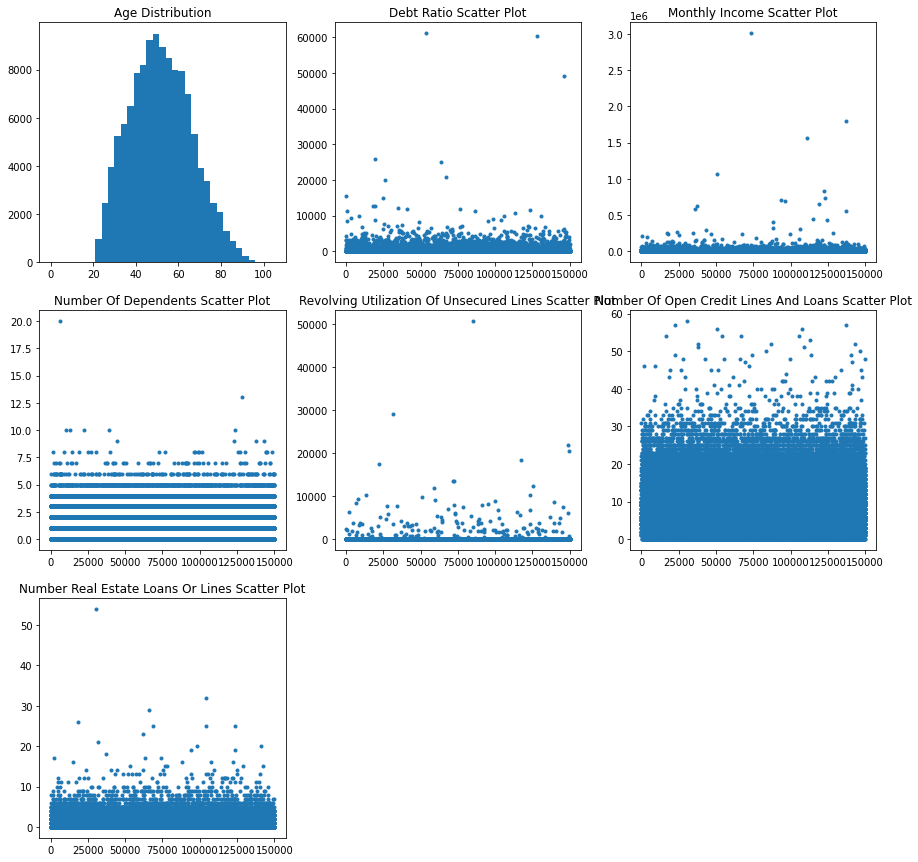

In [6]:
f = plt.figure(figsize=(15,15))
ax = f.add_subplot(331)
ax2 = f.add_subplot(332)
ax3 = f.add_subplot(333)
ax4 = f.add_subplot(334)
ax5 = f.add_subplot(335)
ax6 = f.add_subplot(336)
ax7 = f.add_subplot(337)

ax.hist(df['age'], bins=[3*i for i in range(36)])
ax.set_title('Age Distribution')

ax2.scatter(df['ID'],df['DebtRatio'],marker='.')
ax2.set_title('Debt Ratio Scatter Plot')

ax3.scatter(df['ID'],df['MonthlyIncome'],marker='.')
ax3.set_title('Monthly Income Scatter Plot')

ax4.scatter(df['ID'],df['NumberOfDependents'],marker='.')
ax4.set_title('Number Of Dependents Scatter Plot')

ax5.scatter(df['ID'],df['RevolvingUtilizationOfUnsecuredLines'],marker='.')
ax5.set_title('Revolving Utilization Of Unsecured Lines Scatter Plot')

ax6.scatter(df['ID'],df['NumberOfOpenCreditLinesAndLoans'],marker='.')
ax6.set_title('Number Of Open Credit Lines And Loans Scatter Plot')

ax7.scatter(df['ID'],df['NumberRealEstateLoansOrLines'],marker='.')
ax7.set_title('Number Real Estate Loans Or Lines Scatter Plot')

Text(0.5, 1.0, 'Number Of Times 90 Days Late Scatter Plot')

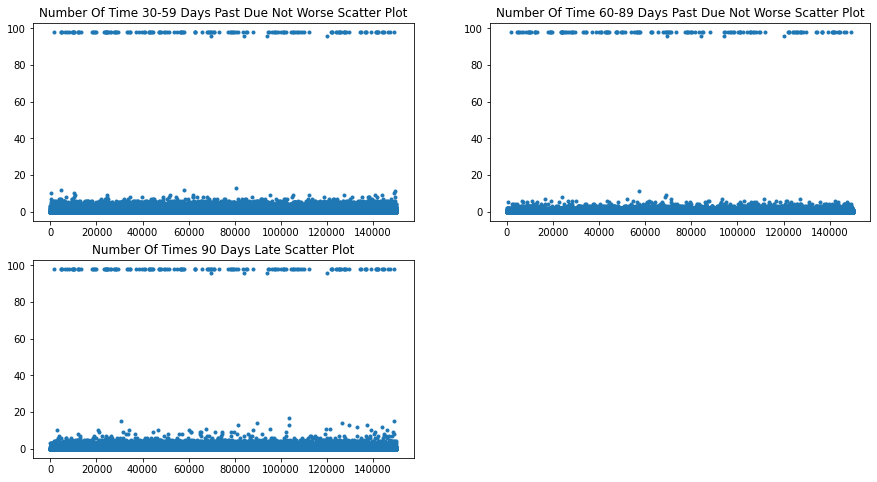

In [7]:
f = plt.figure(figsize=(15,8))
ax = f.add_subplot(221)
ax2 = f.add_subplot(222)
ax3 = f.add_subplot(223)

ax.scatter(df['ID'],df['NumberOfTime30-59DaysPastDueNotWorse'],marker='.')
ax.set_title('Number Of Time 30-59 Days Past Due Not Worse Scatter Plot')

ax2.scatter(df['ID'],df['NumberOfTime60-89DaysPastDueNotWorse'],marker='.')
ax2.set_title('Number Of Time 60-89 Days Past Due Not Worse Scatter Plot')

ax3.scatter(df['ID'],df['NumberOfTimes90DaysLate'],marker='.')
ax3.set_title('Number Of Times 90 Days Late Scatter Plot')

## Data Engineering

In [10]:
df=df[df['DebtRatio']<=1.5]
df=df[df['MonthlyIncome']<=200000]
df=df[df['NumberOfDependents']<=10]
df=df[df['RevolvingUtilizationOfUnsecuredLines']<=1.5]
df=df[df['NumberRealEstateLoansOrLines']<=30]
print('After data engineering, shape of df =',df.shape)

After data engineering, shape of df = (115627, 12)


In [9]:
df.shape

(115627, 12)

Text(0.5, 1.0, 'Number Real Estate Loans Or Lines Scatter Plot')

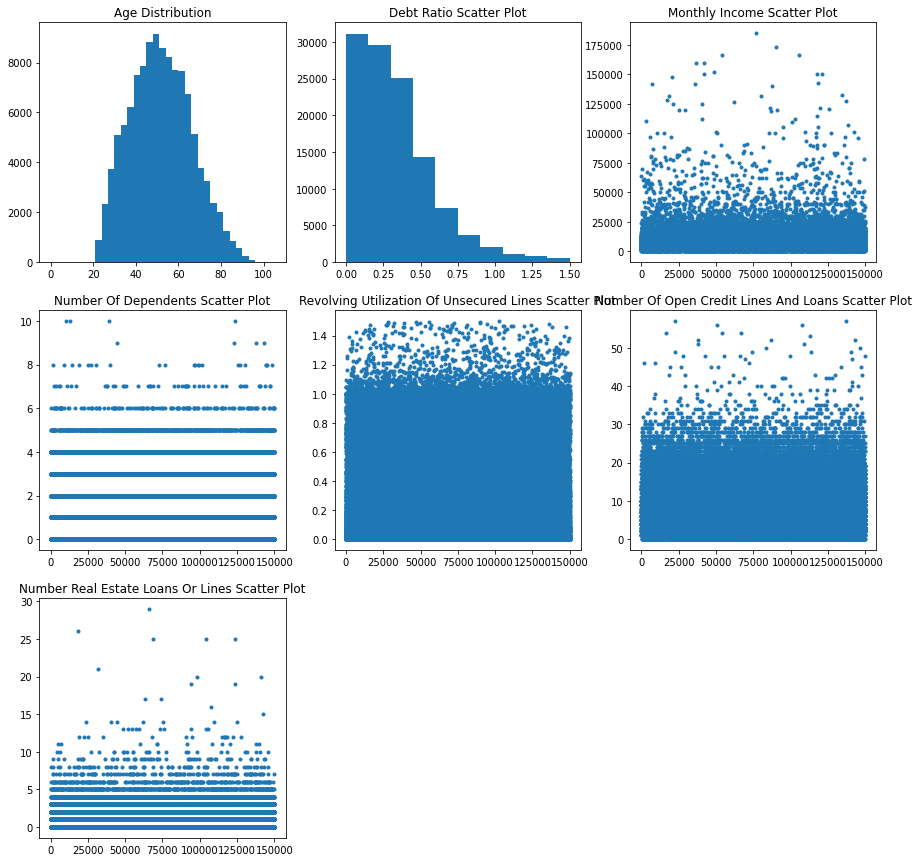

In [12]:
f = plt.figure(figsize=(15,15))
ax = f.add_subplot(331)
ax2 = f.add_subplot(332)
ax3 = f.add_subplot(333)
ax4 = f.add_subplot(334)
ax5 = f.add_subplot(335)
ax6 = f.add_subplot(336)
ax7 = f.add_subplot(337)

ax.hist(df['age'], bins=[3*i for i in range(36)])
ax.set_title('Age Distribution')

ax2.hist(df['DebtRatio'],bins=[0.15*i for i in range(11)])
ax2.set_title('Debt Ratio Distribution')

ax3.scatter(df['ID'],df['MonthlyIncome'],marker='.')
ax3.set_title('Monthly Income Scatter Plot')

ax4.scatter(df['ID'],df['NumberOfDependents'],marker='.')
ax4.set_title('Number Of Dependents Scatter Plot')

ax5.scatter(df['ID'],df['RevolvingUtilizationOfUnsecuredLines'],marker='.')
ax5.set_title('Revolving Utilization Of Unsecured Lines Scatter Plot')

ax6.scatter(df['ID'],df['NumberOfOpenCreditLinesAndLoans'],marker='.')
ax6.set_title('Number Of Open Credit Lines And Loans Scatter Plot')

ax7.scatter(df['ID'],df['NumberRealEstateLoansOrLines'],marker='.')
ax7.set_title('Number Real Estate Loans Or Lines Scatter Plot')

In [13]:
df.to_csv('./cs-training-new.csv')